In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install gdown

In [3]:
!gdown --id 125fd1tJVIc5Q8f6aBsNRZ_BMfgpzEE5i

/opt/conda/lib/python3.10/site-packages/gdown/cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (uriginal): https://drive.google.com/uc?id=125fd1tJVIc5Q8f6aBsNRZ_BMfgpzEE5i
From (redirected): https://drive.google.com/uc?id=125fd1tJVIc5Q8f6aBsNRZ_BMfgpzEE5i&confirm=t&uuid=bde036e3-9a0d-4fc3-8a21-c959f206b19a
To: /kaggle/working/dataset-20231218T104524Z-001.zip
100%|█████████████████████████████████████████| 162M/162M [00:00<00:00, 210MB/s]


In [45]:
import zipfile
import os


# Đường dẫn tới file zip đã tải sẵn trong Google Drive
zip_file_path = '/kaggle/working/dataset-20231218T104524Z-001.zip'

# Thư mục nơi bạn muốn giải nén nội dung
extracted_dir = '/kaggle/working/dataset'

# Kiểm tra xem thư mục đã được giải nén hay chưa
if not os.path.exists(extracted_dir):
    # Nếu chưa, thì tiến hành giải nén
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extracted_dir)
    print(f'Đã giải nén thành công.')
else:
    print(f'Thư mục đã tồn tại, không cần giải nén lại.')

Đã giải nén thành công.


In [46]:
import os
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

# <b>Exploratory Data Analysis (EDA)</b>

## Let's visualize number of training examples for each food item

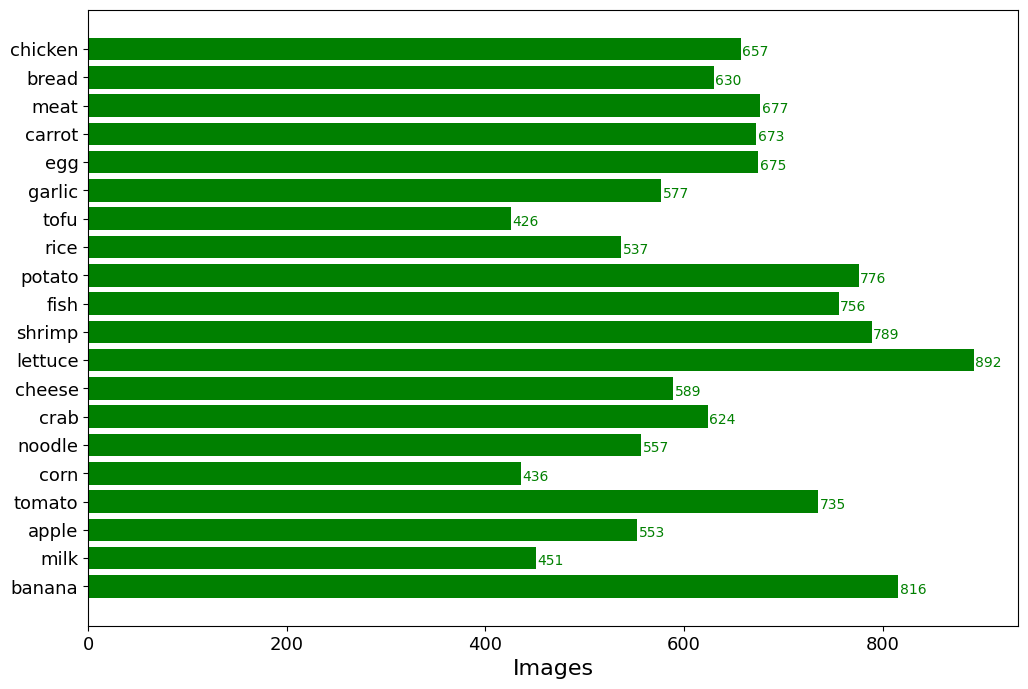

In [6]:
main='/kaggle/working/dataset/'

data=dict()

for i in os.listdir(main):
    sub_dir=os.path.join(main,i)
    count=len(os.listdir(sub_dir))
    data[i]=count


keys = data.keys()
values = data.values()

colors=["red" if x<= 150 else "green" for x in values]

fig, ax = plt.subplots(figsize=(12,8))
y_pos=np.arange(len(values))
plt.barh(y_pos,values,align='center',color=colors)
for i, v in enumerate(values):
    ax.text(v+1.4, i-0.25, str(v), color=colors[i])
ax.set_yticks(y_pos)
ax.set_yticklabels(keys)
ax.set_xlabel('Images',fontsize=16)
plt.xticks(color='black',fontsize=13)
plt.yticks(fontsize=13)
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
import os
import shutil

# Đường dẫn tới thư mục chứa dataset
dataset_path = '/kaggle/working/dataset'

# Lấy danh sách tên các thư mục con
subdirectories = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]

# Chia từng thư mục con thành train set, validation set, và test set
for subdir in subdirectories:
    subdir_path = os.path.join(dataset_path, subdir)

    # Lấy danh sách các file trong thư mục con
    file_names = os.listdir(subdir_path)
    print(subdir)

    # Chia thành train set, validation set, và test set
    train_set, temp_set = train_test_split(file_names, test_size=0.3, random_state=42)
    valid_set, test_set = train_test_split(temp_set, test_size=0.5, random_state=42)

    # Đường dẫn tới thư mục train set, validation set, và test set cho thư mục con
    train_set_path = os.path.join('/kaggle/working/train', subdir)
    valid_set_path = os.path.join('/kaggle/working/valid', subdir)
    test_set_path = os.path.join('/kaggle/working/test', subdir)

    # Tạo thư mục train set, validation set, và test set nếu chưa tồn tại
    os.makedirs(train_set_path, exist_ok=True)
    os.makedirs(valid_set_path, exist_ok=True)
    os.makedirs(test_set_path, exist_ok=True)
    print("Directories created:", train_set_path, valid_set_path, test_set_path)

    # Di chuyển các file của train set vào thư mục train_set_path
    for file_name in train_set:
        source_path = os.path.join(subdir_path, file_name)
        destination_path = os.path.join(train_set_path, file_name)
        try:
            shutil.copyfile(source_path, destination_path)
        except Exception as e:
            print(f"Error copying file: {e}")

    # Di chuyển các file của validation set vào thư mục valid_set_path
    for file_name in valid_set:
        source_path = os.path.join(subdir_path, file_name)
        destination_path = os.path.join(valid_set_path, file_name)
        try:
            shutil.copyfile(source_path, destination_path)
        except Exception as e:
            print(f"Error copying file: {e}")

    # Di chuyển các file của test set vào thư mục test_set_path
    for file_name in test_set:
        source_path = os.path.join(subdir_path, file_name)
        destination_path = os.path.join(test_set_path, file_name)
        try:
            shutil.copyfile(source_path, destination_path)
        except Exception as e:
            print(f"Error copying file: {e}")

banana
Directories created: /kaggle/working/train/banana /kaggle/working/valid/banana /kaggle/working/test/banana
milk
Directories created: /kaggle/working/train/milk /kaggle/working/valid/milk /kaggle/working/test/milk
apple
Directories created: /kaggle/working/train/apple /kaggle/working/valid/apple /kaggle/working/test/apple
tomato
Directories created: /kaggle/working/train/tomato /kaggle/working/valid/tomato /kaggle/working/test/tomato
corn
Directories created: /kaggle/working/train/corn /kaggle/working/valid/corn /kaggle/working/test/corn
noodle
Directories created: /kaggle/working/train/noodle /kaggle/working/valid/noodle /kaggle/working/test/noodle
crab
Directories created: /kaggle/working/train/crab /kaggle/working/valid/crab /kaggle/working/test/crab
cheese
Directories created: /kaggle/working/train/cheese /kaggle/working/valid/cheese /kaggle/working/test/cheese
lettuce
Directories created: /kaggle/working/train/lettuce /kaggle/working/valid/lettuce /kaggle/working/test/lettuc

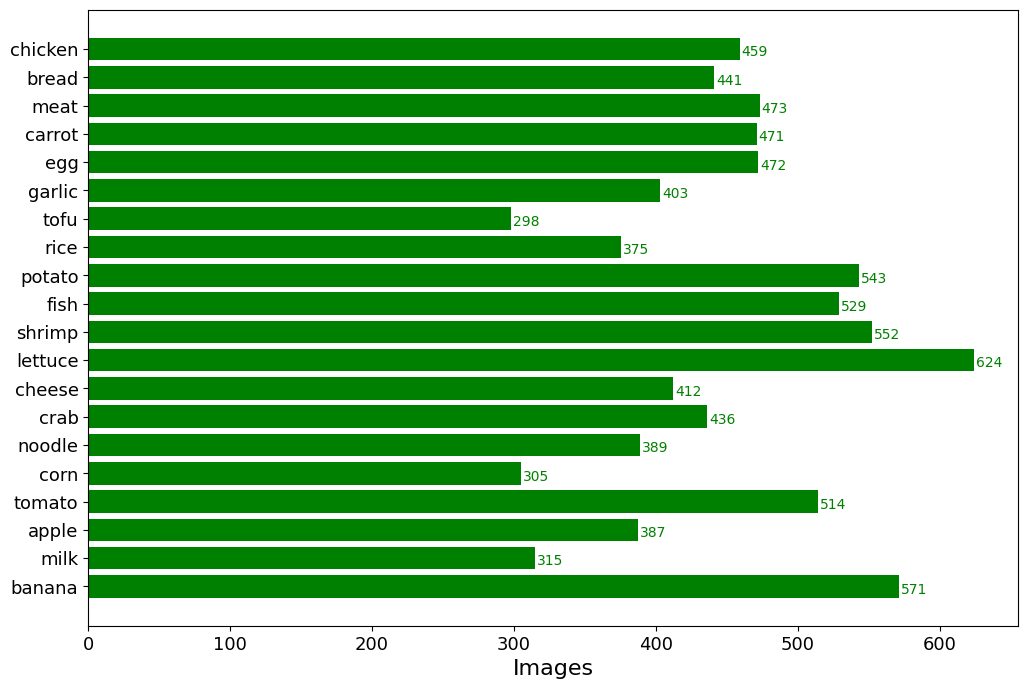

In [8]:
main='/kaggle/working/train/'

data=dict()

for i in os.listdir(main):
    sub_dir=os.path.join(main,i)
    count=len(os.listdir(sub_dir))
    data[i]=count


keys = data.keys()
values = data.values()

colors=["red" if x<= 150 else "green" for x in values]

fig, ax = plt.subplots(figsize=(12,8))
y_pos=np.arange(len(values))
plt.barh(y_pos,values,align='center',color=colors)
for i, v in enumerate(values):
    ax.text(v+1.4, i-0.25, str(v), color=colors[i])
ax.set_yticks(y_pos)
ax.set_yticklabels(keys)
ax.set_xlabel('Images',fontsize=16)
plt.xticks(color='black',fontsize=13)
plt.yticks(fontsize=13)
plt.show()

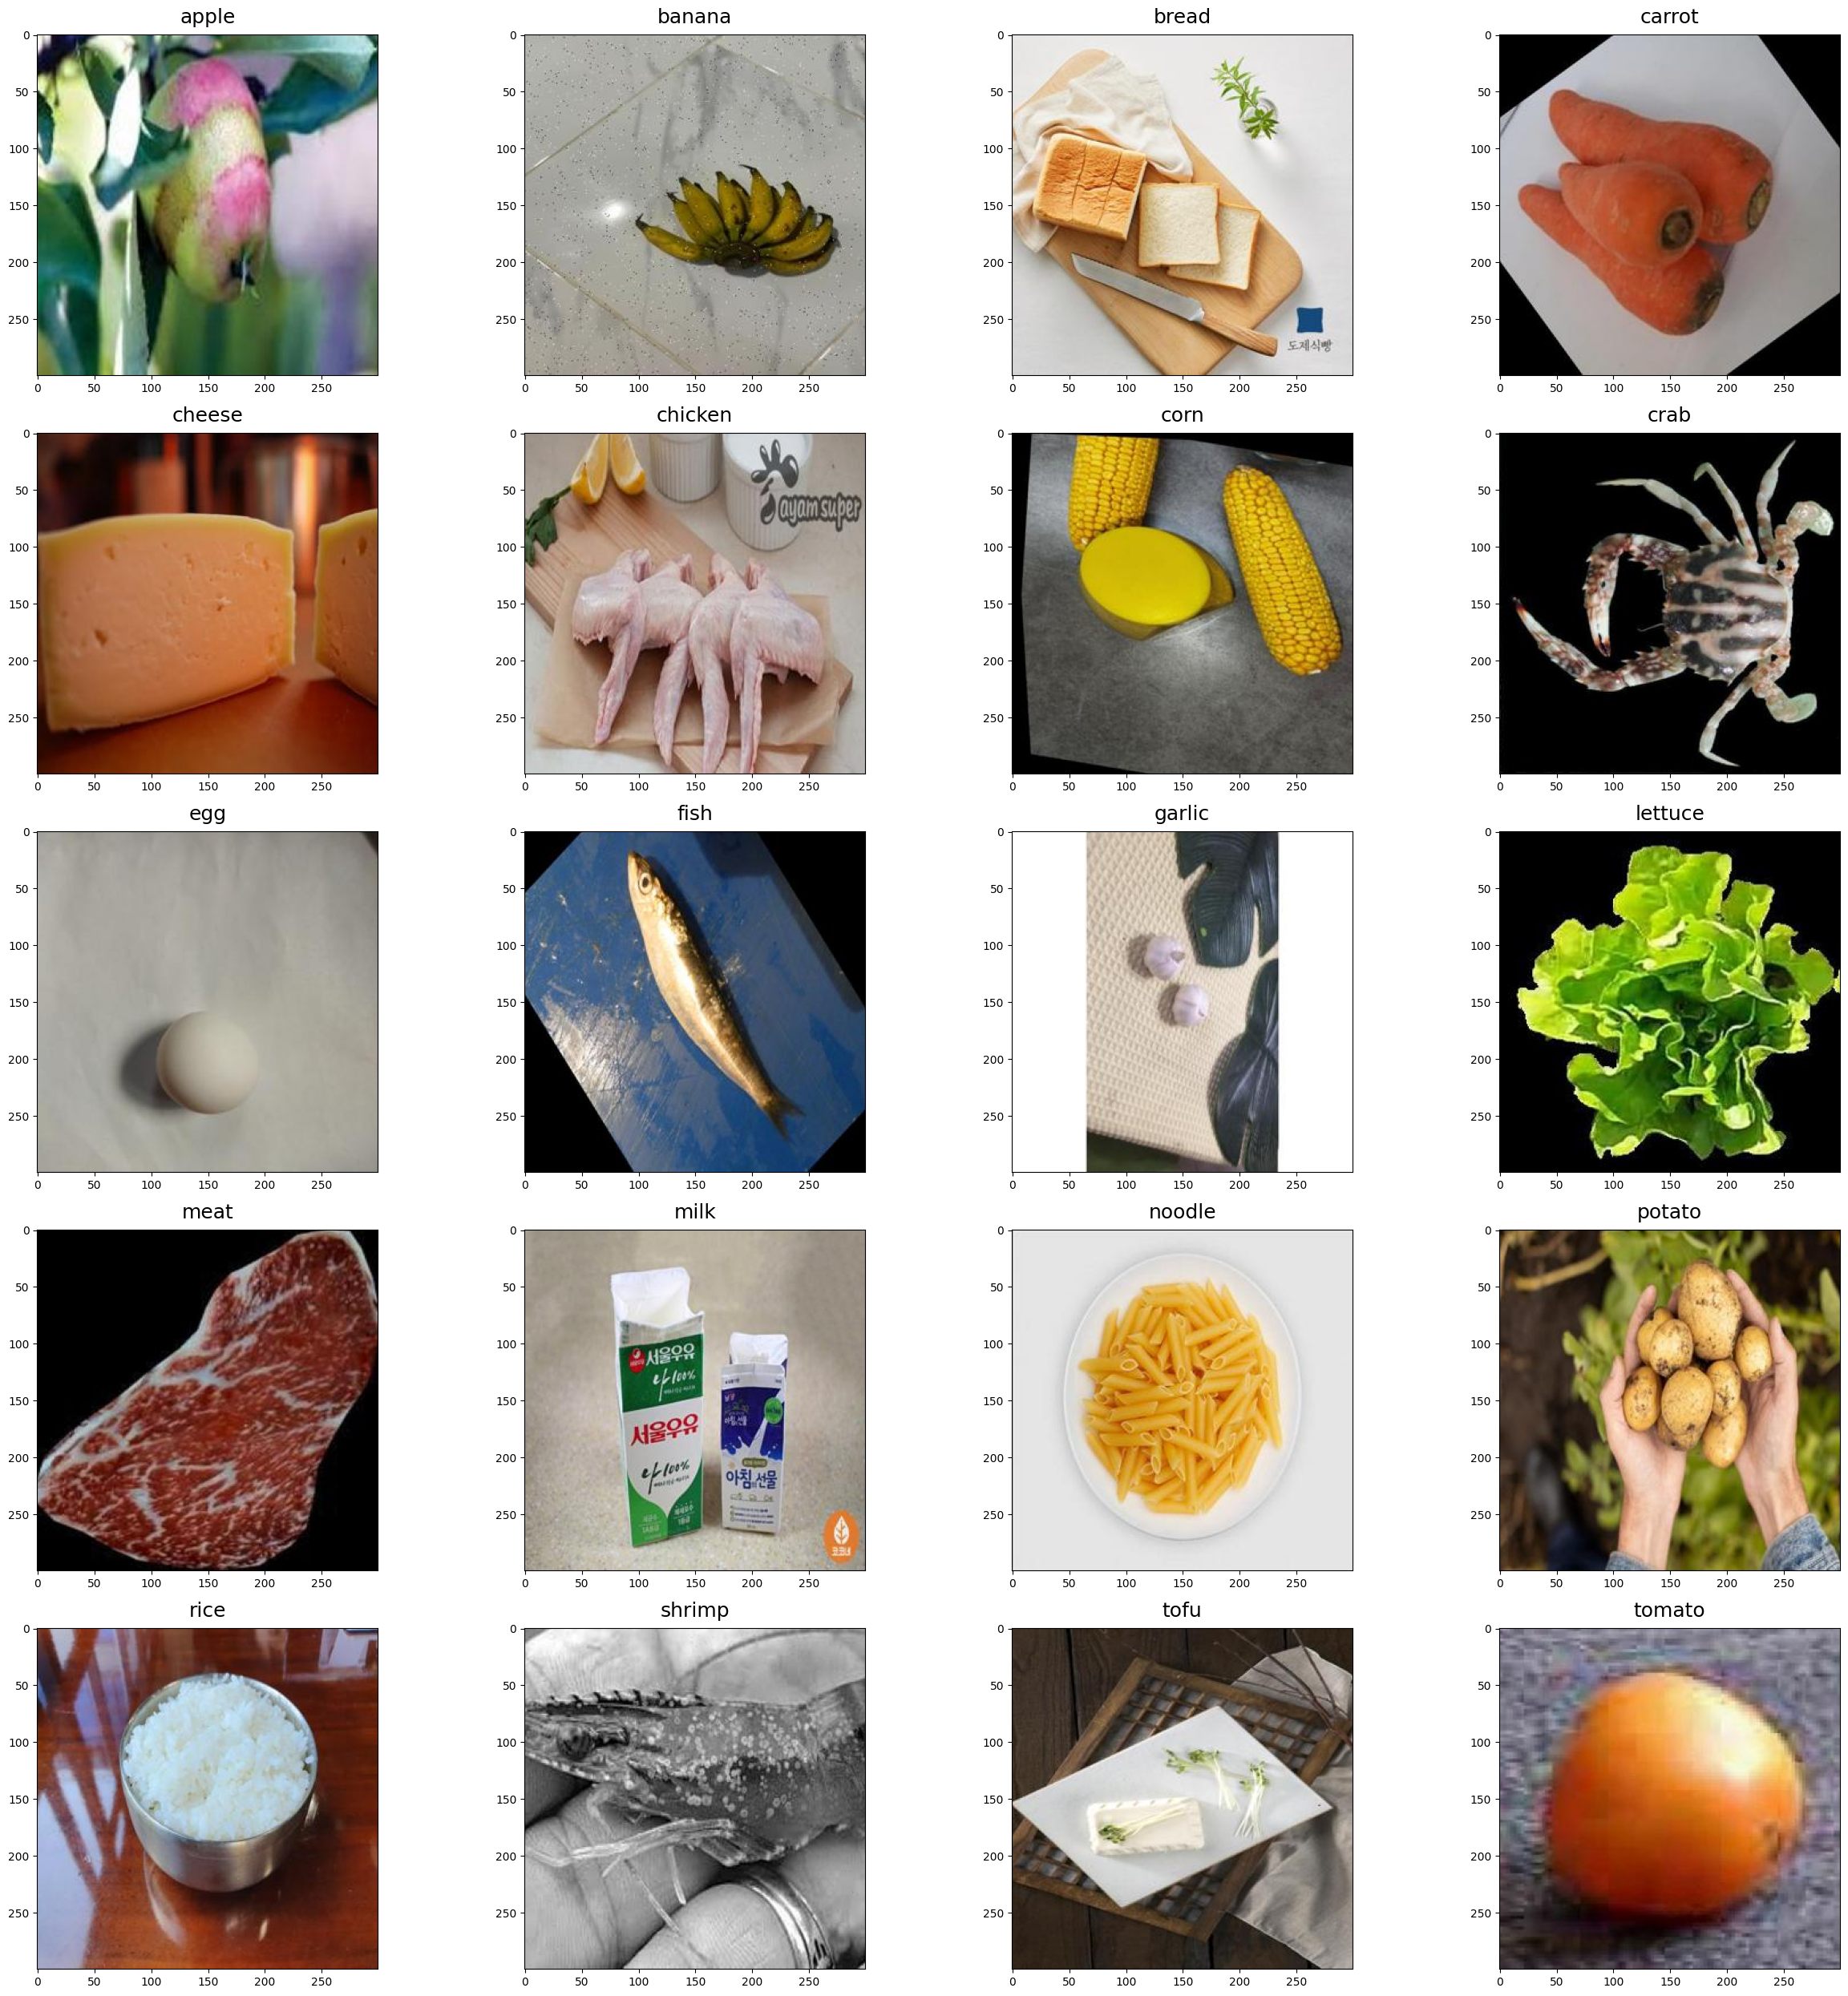

In [9]:
import random

train_folder = '/kaggle/working/train/'
images = []

for food_folder in sorted(os.listdir(train_folder)):
    food_items = os.listdir(train_folder + '/' + food_folder)
    food_selected = np.random.choice(food_items)
    images.append(os.path.join(train_folder,food_folder,food_selected))

fig=plt.figure(1, figsize=(25, 25))

for subplot,image_ in enumerate(images):
    category=image_.split('/')[-2]
    imgs = plt.imread(image_)
    a,b,c=imgs.shape
    fig=plt.subplot(5, 4, subplot+1)
    fig.set_title(category, pad = 10,size=18)
    plt.imshow(imgs)

plt.tight_layout()

# <b> MODEL TRAINING </b>

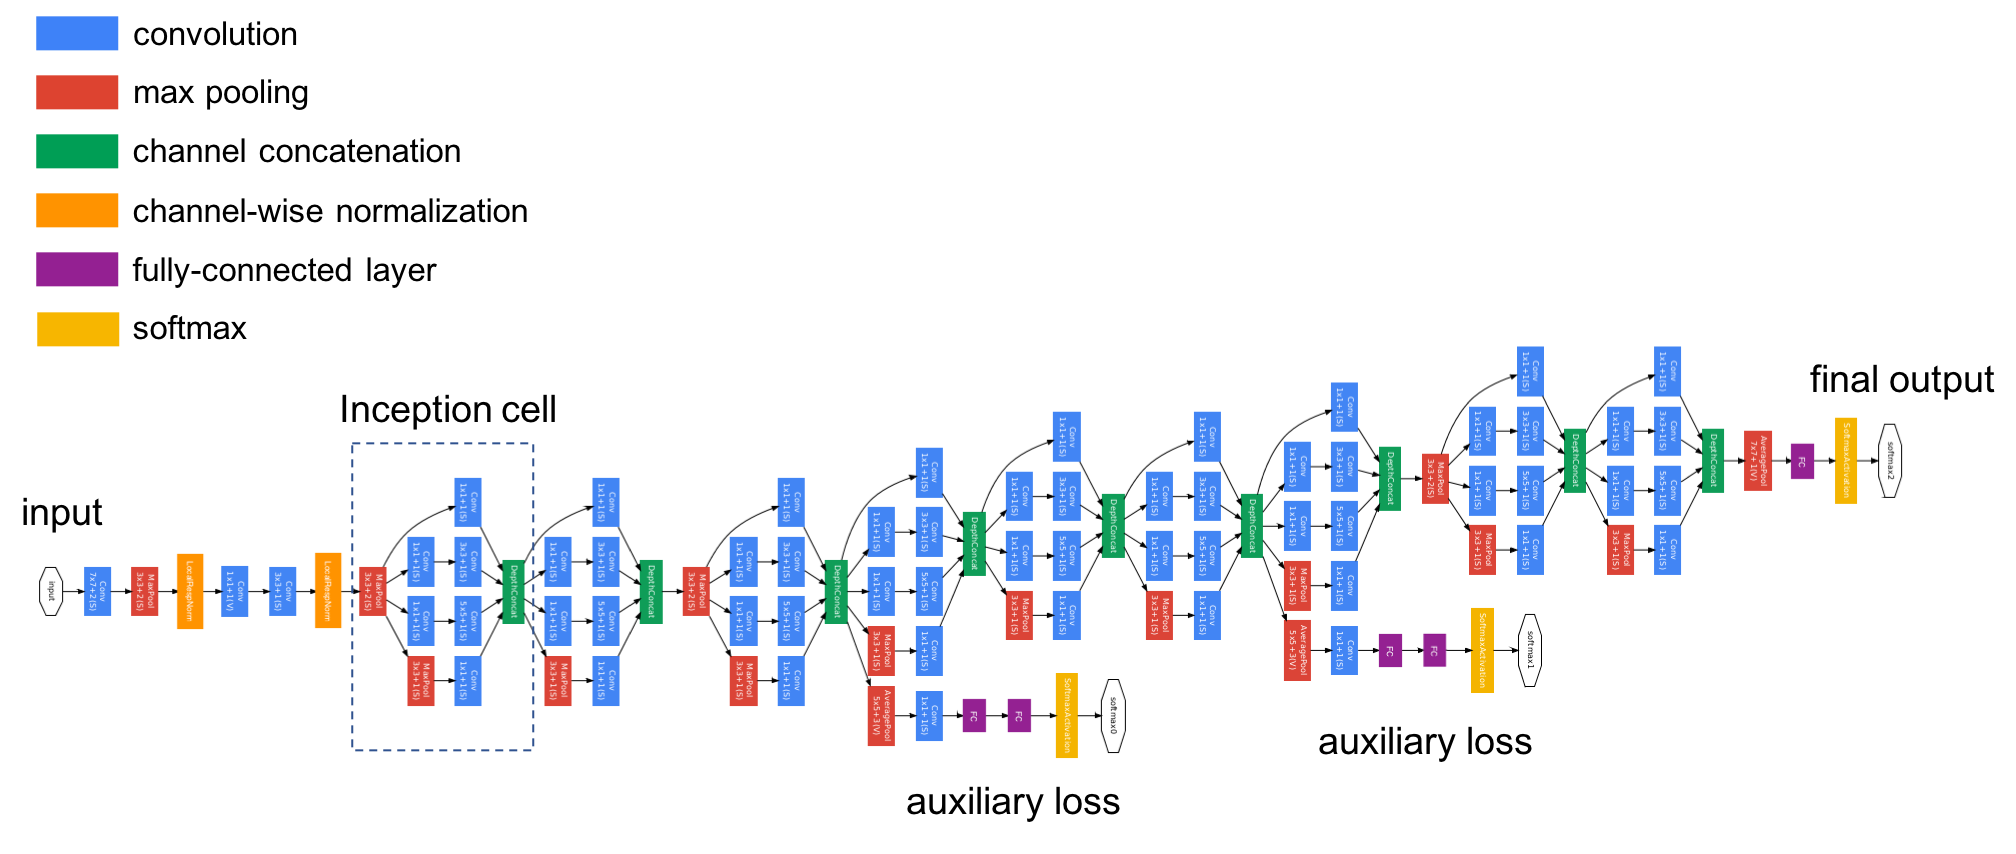

## TraingingArguments

In [10]:
n_classes = 20
batch_size = 32
learning_rate = 0.0001
momentum = 0.9
epochs = 100

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_width, img_height = 299, 299

train_data_dir = '/kaggle/working/train'

# Data Augmentation with ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

val_data_dir = '/kaggle/working/valid'

val_datagen = ImageDataGenerator(rescale=1. / 255)

val_generator = val_datagen.flow_from_directory(
    val_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

Found 8969 images belonging to 20 classes.
Found 1924 images belonging to 20 classes.


In [12]:
class_map = train_generator.class_indices
class_map

{'apple': 0,
 'banana': 1,
 'bread': 2,
 'carrot': 3,
 'cheese': 4,
 'chicken': 5,
 'corn': 6,
 'crab': 7,
 'egg': 8,
 'fish': 9,
 'garlic': 10,
 'lettuce': 11,
 'meat': 12,
 'milk': 13,
 'noodle': 14,
 'potato': 15,
 'rice': 16,
 'shrimp': 17,
 'tofu': 18,
 'tomato': 19}

In [13]:
total_train_samples = len(train_generator.filenames)
total_validation_samples = len(val_generator.filenames)

In [14]:
steps_per_epoch = total_train_samples // batch_size
validation_steps = total_validation_samples // batch_size

## Training the model

In [15]:
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import Dense, Dropout

from tensorflow.keras import regularizers
from tensorflow.keras.regularizers import l2

from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger

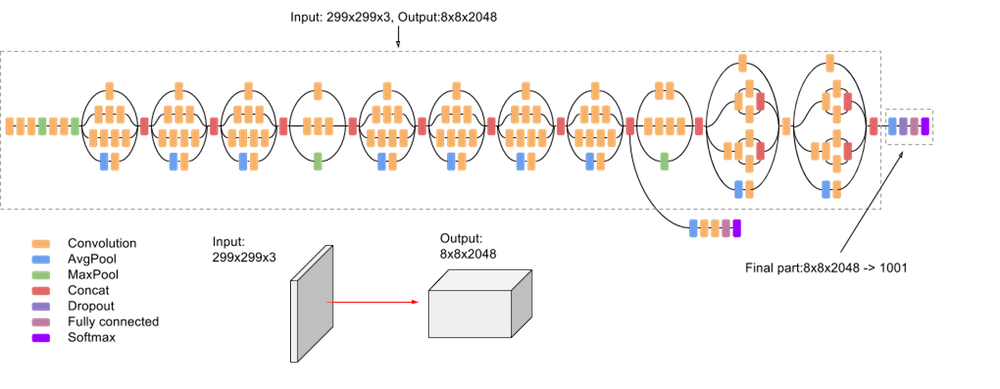

| TYPE          | PATCH/ STRIDE SIZE |  INPUT SIZE |
|---------------|--------------------|-------------|
| Conv          | 3x3/2              | 299×299×3   |
| Conv          | 3x3/1              | 149×149×32  |
| Conv padded   | 3x3/1              | 147×147×32  |
| Pool          | 3x3/2              | 147×147×64  |
| Conv          | 3x3/1              | 73×73×64    |
| Conv          | 3x3/2              | 71×71×80    |
| Conv          | 3x3/1              | 35×35×192   |
| 3 x Inception | Module 1           | 35×35×288   |
| 5 x Inception | Module 2           | 17×17×768   |
| 2 x Inception | Module 3           | 8×8×1280    |
| Pool          | 8 x 8              | 8×8×2048    |
| Linear        | Logits             | 1×1×2048    |
| Softmax       | Classifier         | 1×1×1000    |

In [16]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, AveragePooling2D, concatenate, Flatten, Dense
from tensorflow.keras.models import Model

def InceptionV3(input_shape=(299, 299, 3), num_classes=10):
    input_layer = Input(shape=input_shape)

    # Conv1
    x = Conv2D(32, (3, 3), strides=(2, 2), activation='relu', padding='valid')(input_layer)
    x = Conv2D(32, (3, 3), activation='relu', padding='valid')(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)

    # Pool
    x = MaxPooling2D((3, 3), strides=(2, 2))(x)

    # Conv2
    x = Conv2D(80, (3, 3), activation='relu', padding='valid')(x)
    x = Conv2D(192, (3, 3), activation='relu', padding='valid')(x)

    # Inception Modules
    x = inception_block(x, [64, 128, 128, 32, 32, 32])  # Inception Module 1
    x = inception_block(x, [128, 192, 96, 64, 64, 64])  # Inception Module 2
    x = inception_block(x, [192, 208, 48, 64, 64, 64])  # Inception Module 3

    # Pooling
    x = AveragePooling2D((8, 8))(x)

    # Fully Connected Layers
    x = Flatten()(x)
    x = Dense(2048, activation='relu')(x)
    x = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=input_layer, outputs=x)

    return model

def inception_block(x, filters):
    conv1x1_1 = Conv2D(filters[0], (1, 1), padding='same', activation='relu')(x)

    conv1x1_3 = Conv2D(filters[1], (1, 1), padding='same', activation='relu')(x)
    conv3x3 = Conv2D(filters[2], (3, 3), padding='same', activation='relu')(conv1x1_3)

    conv1x1_5 = Conv2D(filters[3], (1, 1), padding='same', activation='relu')(x)
    conv5x5 = Conv2D(filters[4], (5, 5), padding='same', activation='relu')(conv1x1_5)

    pool = MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    conv1x1_pool = Conv2D(filters[5], (1, 1), padding='same', activation='relu')(pool)

    inception_block = concatenate([conv1x1_1, conv3x3, conv5x5, conv1x1_pool], axis=-1)
    return inception_block

# Sử dụng hàm để xây dựng mô hình
input_shape = (299, 299, 3)
model = InceptionV3(input_shape=input_shape, num_classes=n_classes)
model.compile(optimizer=SGD(learning_rate=learning_rate, momentum=momentum), loss='categorical_crossentropy', metrics=['accuracy'])
# In ra cấu trúc của mô hình
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 149, 149, 32)         896       ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 147, 147, 32)         9248      ['conv2d[0][0]']              
                                                                                                  
 conv2d_2 (Conv2D)           (None, 147, 147, 64)         18496     ['conv2d_1[0][0]']            
                                                                                              

In [17]:
checkpointer = ModelCheckpoint(filepath='v1_inceptionV3', verbose=1, save_best_only=True)
csv_logger = CSVLogger('history_v1_inceptionV3.log')

history = model.fit_generator(train_generator,
                    steps_per_epoch = steps_per_epoch,
                    validation_data=val_generator,
                    validation_steps=validation_steps,
                    epochs=epochs,
                    verbose=1,
                    callbacks=[csv_logger, checkpointer])

Epoch 1/100
280/280 [==============================] - ETA: 0s - loss: 2.9843 - accuracy: 0.0643
Epoch 1: val_loss improved from inf to 2.97196, saving model to v1_inceptionV3
280/280 [==============================] - 198s 650ms/step - loss: 2.9843 - accuracy: 0.0643 - val_loss: 2.9720 - val_accuracy: 0.1000
Epoch 2/100
280/280 [==============================] - ETA: 0s - loss: 2.9573 - accuracy: 0.0981
Epoch 2: val_loss improved from 2.97196 to 2.94153, saving model to v1_inceptionV3
280/280 [==============================] - 183s 651ms/step - loss: 2.9573 - accuracy: 0.0981 - val_loss: 2.9415 - val_accuracy: 0.1375
Epoch 3/100
280/280 [==============================] - ETA: 0s - loss: 2.9208 - accuracy: 0.1281
Epoch 3: val_loss improved from 2.94153 to 2.89629, saving model to v1_inceptionV3
280/280 [==============================] - 182s 649ms/step - loss: 2.9208 - accuracy: 0.1281 - val_loss: 2.8963 - val_accuracy: 0.1906
Epoch 4/100
280/280 [==============================] - ETA:

## Saving the model

In [29]:
model.save('model_v1_inceptionV3.h5')

## Accuracy and Loss curves

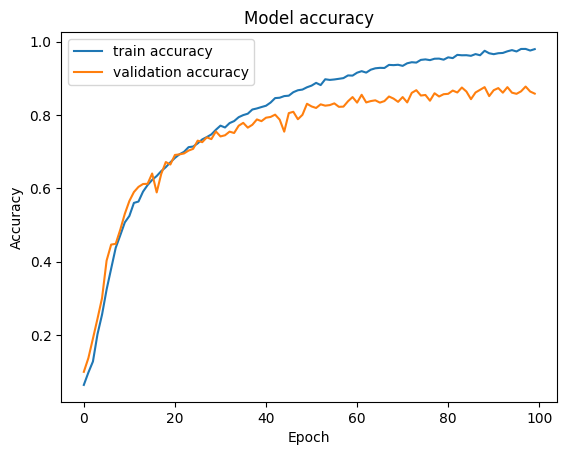

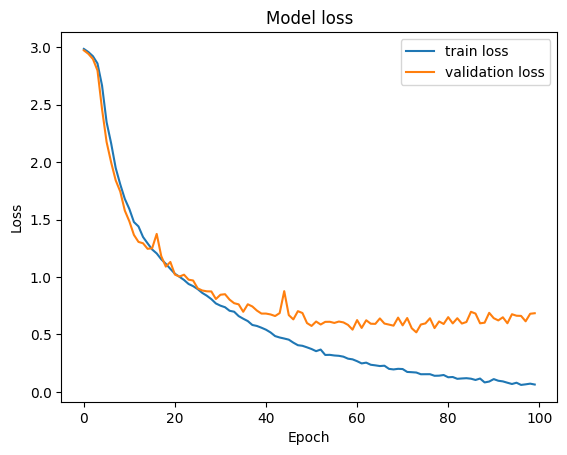

In [30]:
def plot_accuracy(history):

    plt.plot(history.history['accuracy'],label='train accuracy')
    plt.plot(history.history['val_accuracy'],label='validation accuracy')
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.savefig('Accuracy_v1_InceptionV3')
    plt.show()

def plot_loss(history):

    plt.plot(history.history['loss'],label="train loss")
    plt.plot(history.history['val_loss'],label="validation loss")
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.savefig('Loss_v1_InceptionV3')
    plt.show()

plot_accuracy(history)
plot_loss(history)

# <b> PREDICTIONS </b>

## Load the model

In [31]:
from tensorflow.keras.models import load_model
from tensorflow.keras import backend as K

In [32]:
K.clear_session()
path_to_model='./model_v1_inceptionV3.h5'
print("Loading the model..")
model = load_model(path_to_model)
print("Done!")

Loading the model..
Done!


## Testing model on test set

In [33]:
test_data_dir = '/kaggle/working/test'

test_datagen = ImageDataGenerator(rescale=1. / 255)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

Found 1933 images belonging to 20 classes.


In [34]:
scores = model.evaluate_generator(test_generator)

print("Test Accuracy: {:.3f}".format(scores[1]))

Test Accuracy: 0.879


## Function to predict single image or predict all images from a directory

In [35]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [36]:
category={
    0: ['apple','Apple'], 1: ['banana','Banana'], 2: ['bread','Bread'], 3: ['carrot', 'Carrot'], 4: ['cheese', 'Cheese'],
    5: ['chicken','Chicken'], 6:['corn','Corn'], 7: ['crab','Crab'], 8: ['egg','Egg'], 9:['fish', 'Fish'], 10: ['garlic', 'Garlic'], 
    11: ['lettuce', 'Lettuce'], 12: ['meat', 'Meat'], 13: ['milk','Milk'], 14:['noodle', 'Noodle'], 15: ['potato','Potato'], 
    16: ['rice', 'Rice'], 17: ['shrimp', 'Shrimp'], 18: ['tofu', 'Tofu'], 19: ['tomato', 'Tomato']
}

In [37]:
def predict_image(filename,model):
    img_ = image.load_img(filename, target_size=(299, 299))
    img_array = image.img_to_array(img_)
    img_processed = np.expand_dims(img_array, axis=0)
    img_processed /= 255.

    prediction = model.predict(img_processed)

    index = np.argmax(prediction)

    plt.title("Prediction - {}".format(category[index][1]))
    plt.imshow(img_array)

def predict_dir(filedir,model):
    cols=5
    pos=0
    images=[]
    total_images=len(os.listdir(filedir))
    rows=total_images//cols + 1

    true=filedir.split('/')[-1]

    fig=plt.figure(1, figsize=(25, 25))

    for i in sorted(os.listdir(filedir)):
        images.append(os.path.join(filedir,i))

    for subplot,imggg in enumerate(images):
        img_ = image.load_img(imggg, target_size=(299, 299))
        img_array = image.img_to_array(img_)

        img_processed = np.expand_dims(img_array, axis=0)

        img_processed /= 255.
        prediction = model.predict(img_processed)
        index = np.argmax(prediction)

        pred=category.get(index)[0]
        if pred==true:
            pos+=1

        fig=plt.subplot(rows, cols, subplot+1)
        fig.set_title(category.get(index)[1], pad = 10,size=18)
        plt.imshow(img_array)

    acc=pos/total_images
    print("Accuracy of Test : {:.2f} ({pos}/{total})".format(acc,pos=pos,total=total_images))
    plt.tight_layout()

- <h3> Single image prediction </h3>

1/1 [==============================] - 0s 226ms/step


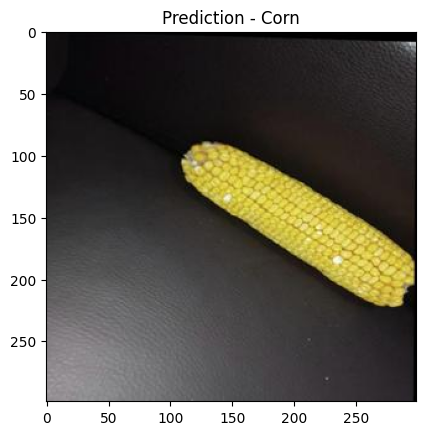

In [38]:
predict_image('/kaggle/working/test/corn/276.jpg',model)

1/1 [==============================] - 0s 19ms/step


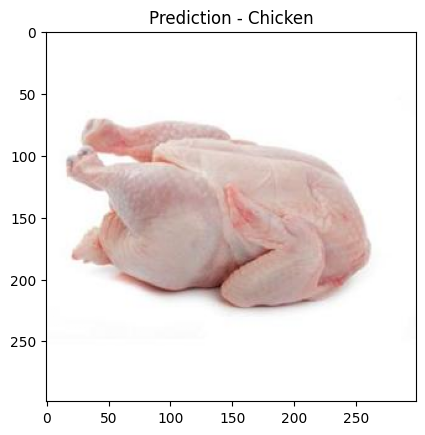

In [40]:
predict_image('/kaggle/working/test/chicken/184.jpg',model)

1/1 [==============================] - 0s 20ms/step


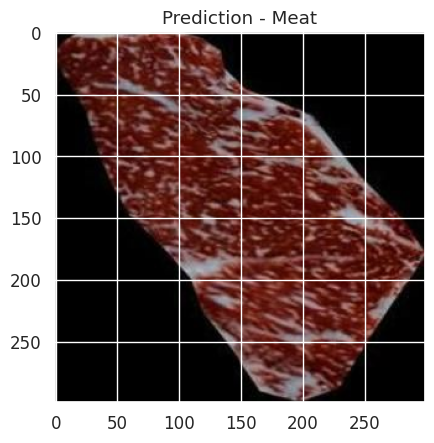

In [54]:
predict_image('/kaggle/input/meat12/meat.jpeg',model)

- <h3> Predicting category </h3>

1/1 [==============================] - 0s 20ms/step
Accuracy of Test : 0.89 (75/84)


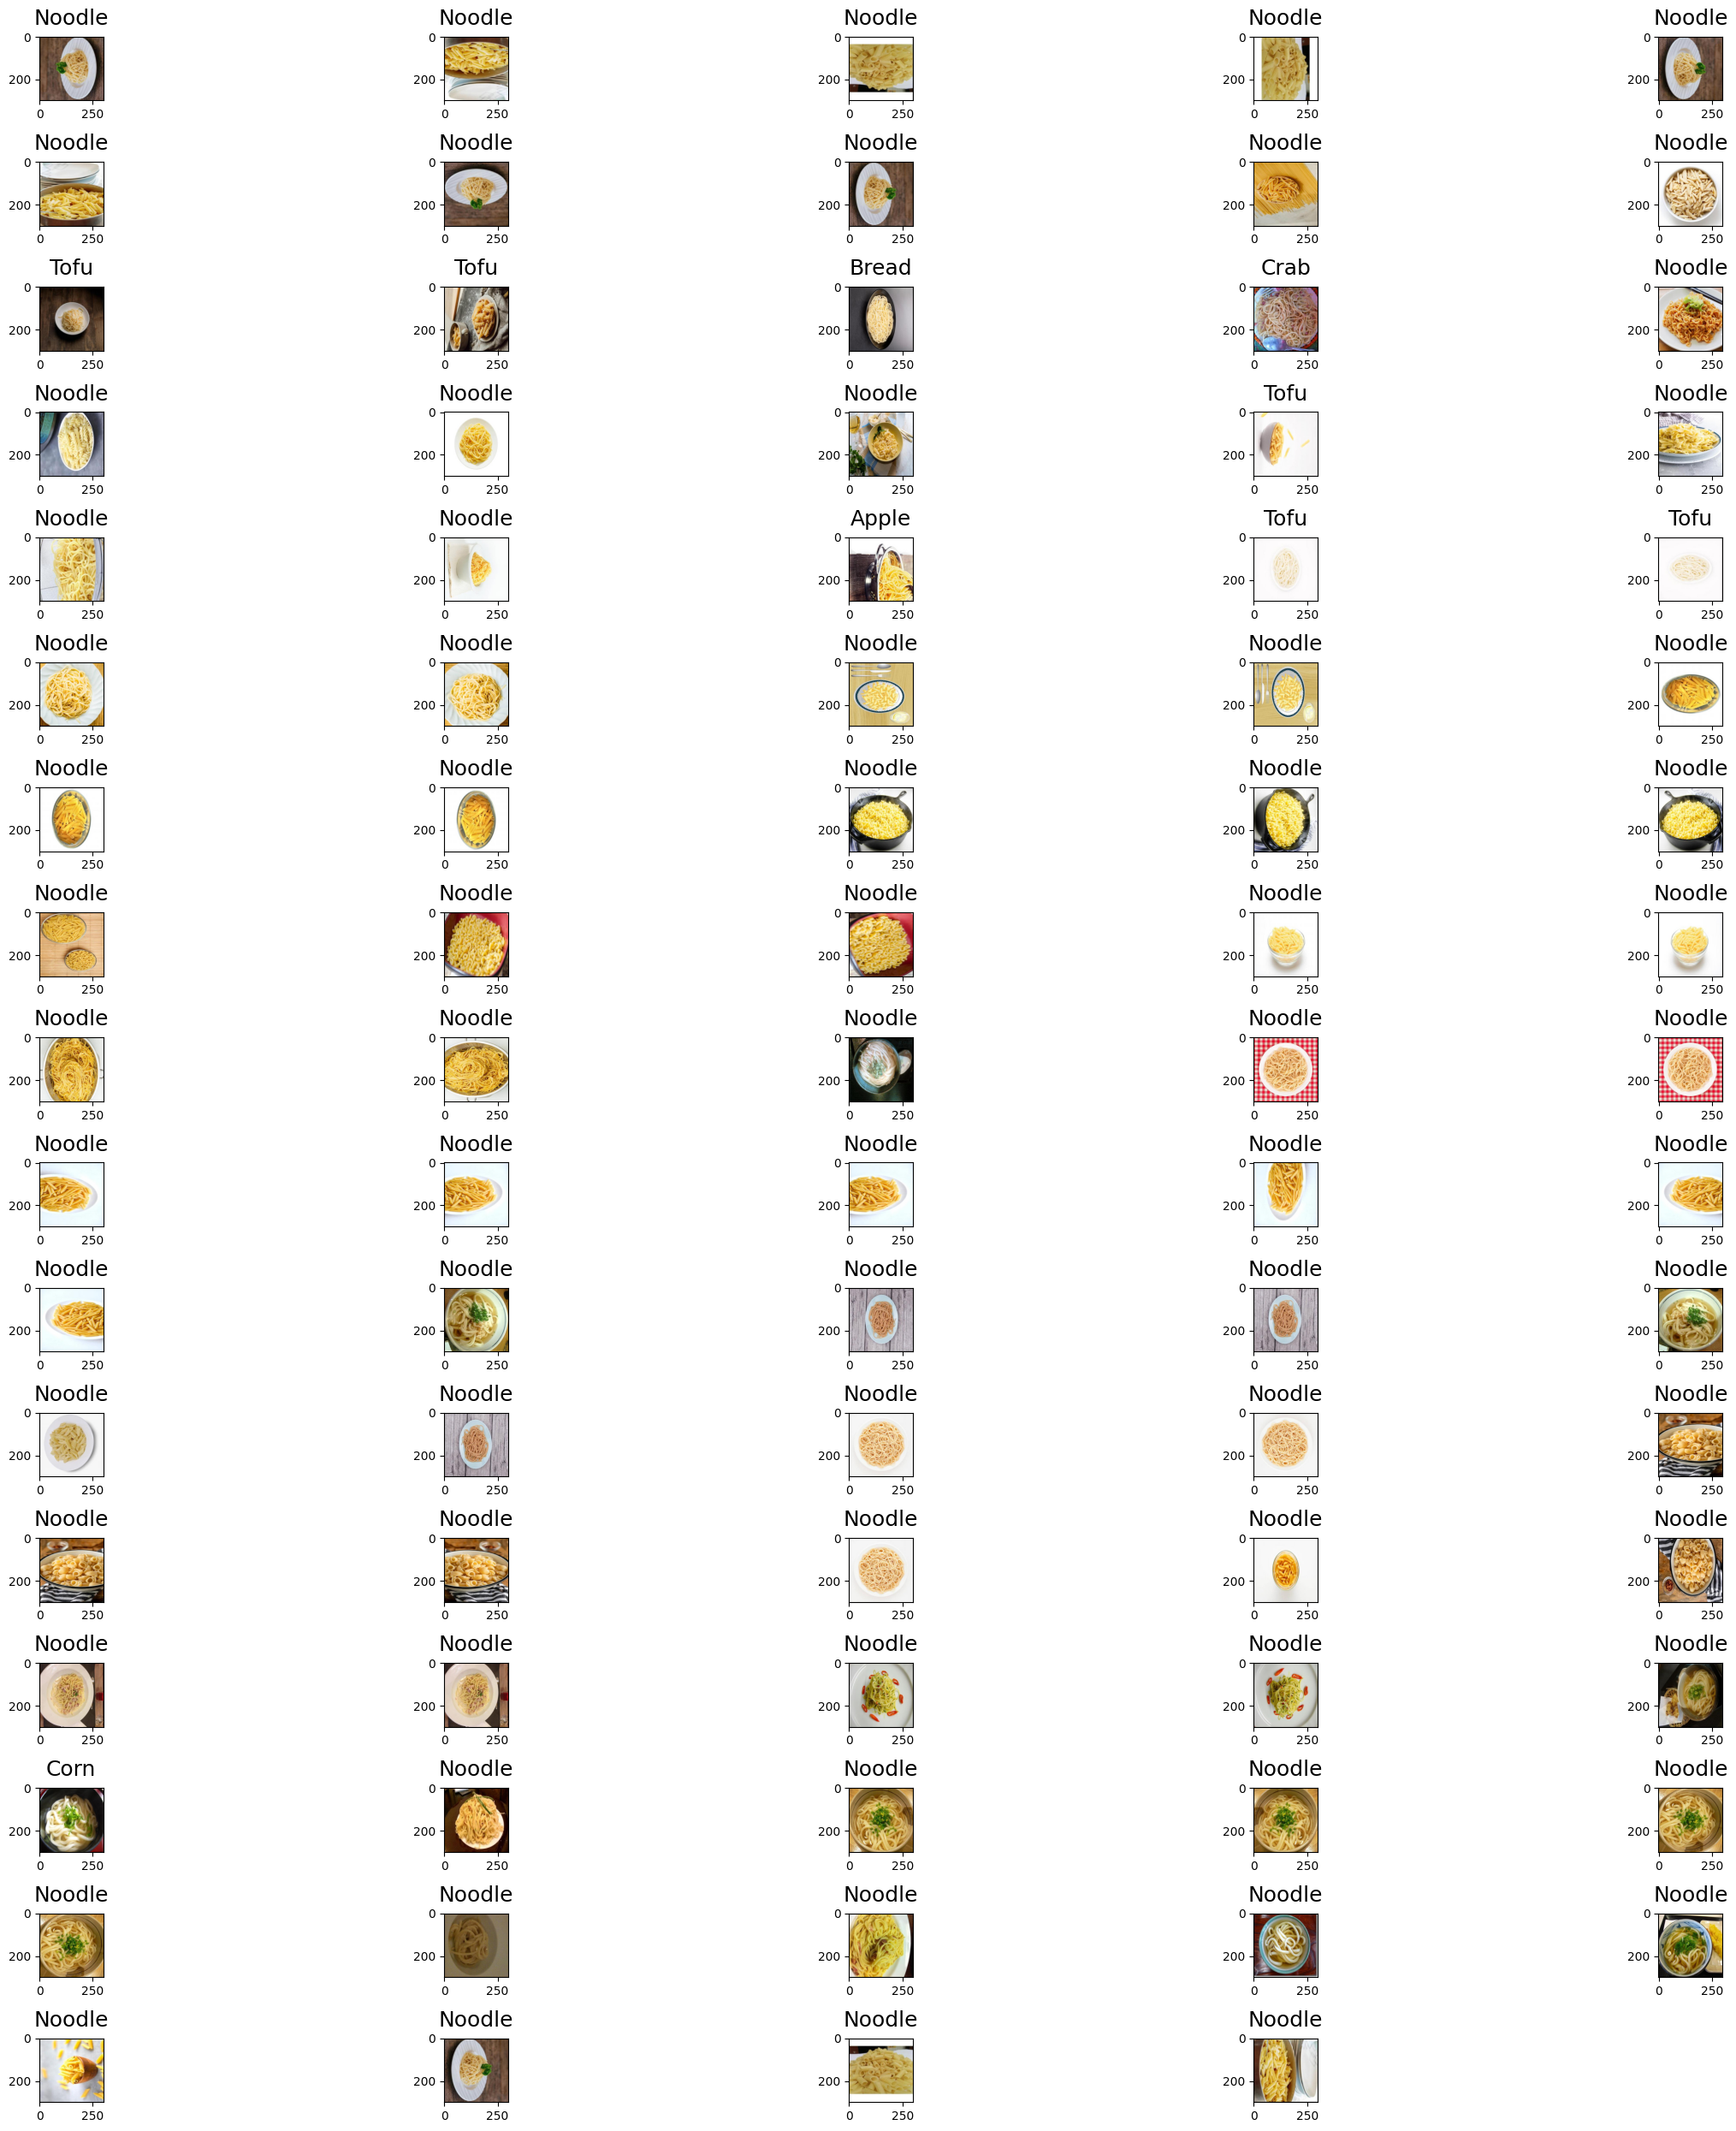

In [41]:
predict_dir("/kaggle/working/test/noodle",model)

## Let's plot a confusion matrix for all the food items

In [44]:
from sklearn.metrics import confusion_matrix
import itertools

img_width, img_height = 299, 299

def labels_confusion_matrix():
    folder_path="/kaggle/working/test"

    mapping={}
    for i,j in enumerate(sorted(os.listdir(folder_path))):
        mapping[j]=i

    files=[]
    real=[]
    predicted=[]

    for i in os.listdir(folder_path):

        true=os.path.join(folder_path,i)
        true=true.split('/')[-1]
        true=mapping[true]

        for j in os.listdir(os.path.join(folder_path,i)):

            img_ = image.load_img(os.path.join(folder_path,i,j), target_size=(img_height, img_width))
            img_array = image.img_to_array(img_)
            img_processed = np.expand_dims(img_array, axis=0)
            img_processed /= 255.
            prediction = model.predict(img_processed)
            index = np.argmax(prediction)

            predicted.append(index)
            real.append(true)

    return (real,predicted)

def print_confusion_matrix(real, predicted, category):
    cmap = "viridis"

    # Lấy danh sách nhãn từ dictionary 'category'
    labels = [category[i][1] for i in range(len(category))]

    cm = confusion_matrix(y_true=real, y_pred=predicted)
    df_cm = pd.DataFrame(cm, index=labels, columns=labels)

    sns.set(font_scale=1.1)  # for label size
    plt.figure(figsize=(12, 8))  # Thay đổi kích thước của hình ảnh

    # Điều chỉnh kích thước biểu đồ bằng param 'cbar_kws'
    s = sns.heatmap(df_cm, annot=True, fmt='d', cmap=cmap, cbar_kws={"shrink": 0.6})  # Sử dụng fmt='d'
    
    plt.xticks(rotation=90)

    # Tùy chọn, đặt tỷ lệ khung hình cho matrix
    s.set_aspect('equal', adjustable='box')

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig('confusion_matrix.png')
    plt.show()

1/1 [==============================] - 0s 19ms/step


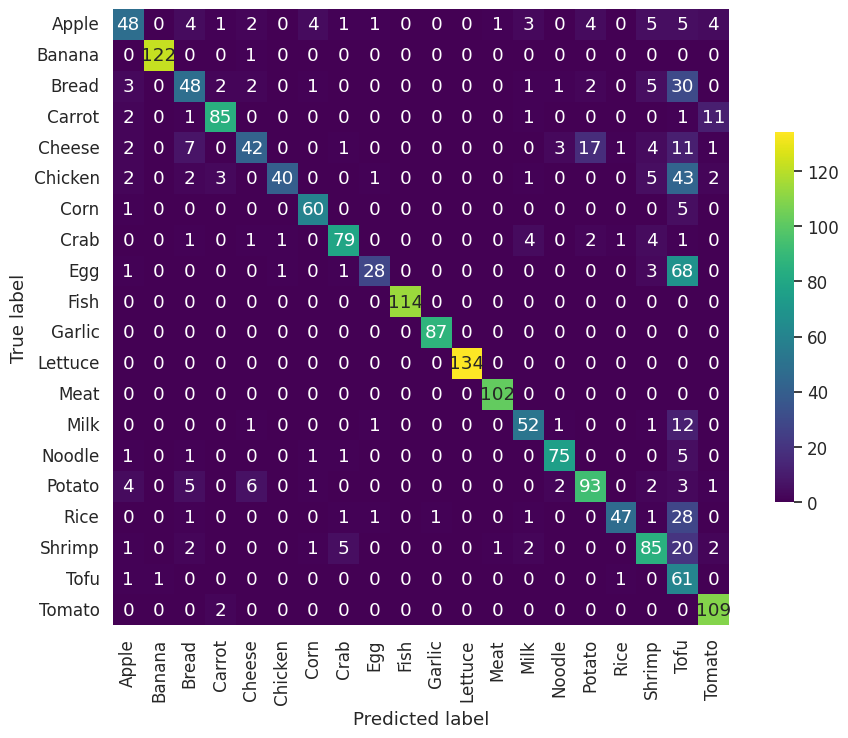

In [43]:
y_true,y_pred=labels_confusion_matrix()
print_confusion_matrix(y_true,y_pred, category)